In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [103]:
df = pd.read_csv('Dataset.csv', encoding='ISO-8859-1')
df.head()


,doi,polymer(s),is_solvent_blend,solvent(s),solvent_components,solution_concentration,solution_concentration_unit,needle_type,needle_diameter_g,collector_type,rotation_speed_rpm,voltage_kv,flow_rate_ml/h,tip_collector_distance_cm,temperature_c,humidity_%,was_formation_stable,fiber_diameter_nm,fiber_diameter_variation_nm,tail_observation
0,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",15.0,wt%,Single Needle,22.0,Flat,NaN,12.0,2.0,6.0,23.0,45,True,1346.0,812.0,True
1,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",12.0,wt%,Single Needle,22.0,Flat,NaN,16.0,2.0,6.0,23.0,45,True,488.0,221.0,False
2,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",15.0,wt%,Single Needle,22.0,Flat,NaN,16.0,2.0,10.0,23.0,45,True,823.0,519.0,False
3,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",9.0,wt%,Single Needle,22.0,Flat,NaN,12.0,2.0,6.0,23.0,45,True,452.0,236.0,False
4,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",12.0,wt%,Single Needle,22.0,Flat,NaN,12.0,2.0,10.0,23.0,45,True,801.0,382.0,False


In [104]:
print(len(df))

809


In [121]:
df.columns

Index(['doi', 'polymer(s)', 'is_solvent_blend', 'solvent(s)',
       'solvent_components', 'solution_concentration',
       'solution_concentration_unit', 'needle_type', 'needle_diameter_g',
       'collector_type', 'rotation_speed_rpm', 'voltage_kv', 'flow_rate_ml/h',
       'tip_collector_distance_cm', 'temperature_c', 'humidity_%',
       'was_formation_stable', 'fiber_diameter_nm',
       'fiber_diameter_variation_nm', 'tail_observation'],
      dtype='object')

In [105]:
unique_values = df['polymer(s)'].unique()
print(unique_values)


['CA' 'PAN' 'PCL' 'PDLLA' 'PET' 'PLA' 'PS' 'PVA' 'PVDF' 'PVP' 'Y_PGA'
 'PMMA']


In [106]:
df.describe()

,solution_concentration,needle_diameter_g,rotation_speed_rpm,voltage_kv,flow_rate_ml/h,tip_collector_distance_cm,temperature_c,fiber_diameter_nm,fiber_diameter_variation_nm
count,809.000000,499.000000,254.000000,809.000000,809.000000,809.000000,595.000000,777.000000,345.000000
mean,15.483671,18.953908,674.811024,17.485909,1.498578,15.830161,22.336134,555.942098,108.283710
std,5.999565,4.493623,792.090687,7.149800,2.810650,6.308526,3.305126,863.830465,131.165289
min,5.000000,7.000000,20.000000,5.000000,0.100000,2.000000,18.000000,55.000000,4.000000
25%,10.000000,14.000000,100.000000,14.000000,0.300000,12.000000,20.000000,228.560000,30.000000
50%,15.000000,21.000000,180.000000,16.000000,0.700000,15.000000,22.000000,335.600000,48.000000
75%,20.000000,22.000000,1000.000000,20.000000,1.080000,18.000000,23.000000,625.000000,116.000000
max,30.300000,26.000000,3000.000000,50.000000,22.000000,50.000000,50.000000,13080.000000,812.000000


In [107]:
polymer_counts = df['polymer(s)'].value_counts()

print(polymer_counts)


polymer(s)
PVDF     351
PVA      141
PVP       95
PAN       62
PS        45
PCL       26
PMMA      20
Y_PGA     18
PDLLA     16
CA        15
PET       12
PLA        8
Name: count, dtype: int64


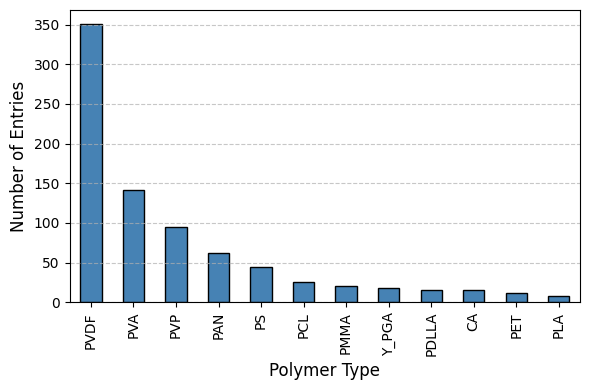

In [108]:
fig, ax = plt.subplots(figsize=(6
                                , 4))

polymer_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

ax.set_xlabel('Polymer Type', fontsize=12)
ax.set_ylabel('Number of Entries', fontsize=12)
# ax.set_title('Number of Entries per Polymer Type', fontsize=14, fontweight='bold')

ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [109]:
solvent_counts = df['solvent(s)'].value_counts()

print(solvent_counts)


solvent(s)
DMF                   209
WATER                 144
DMAC-ACETONE          135
DMF-ACETONE           133
ETHANOL                65
DMSO-ACETONE           36
ACETONE                21
TFA                    20
ACETONE-CHLOROFORM     10
TFA-DSM                 9
AC-DMF                  8
ACETIC_ACID             7
CHLOROFORM-ETHANOL      6
NMP-ACETONE             6
Name: count, dtype: int64


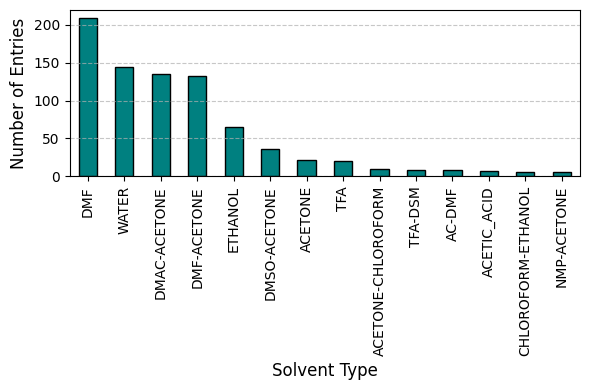

In [110]:

fig, ax = plt.subplots(figsize=(6, 4))

solvent_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='black')

ax.set_xlabel('Solvent Type', fontsize=12)
ax.set_ylabel('Number of Entries', fontsize=12)
# ax.set_title('Number of Entries per Solvent Type', fontsize=14, fontweight='bold')

ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [111]:
grouped_polymer_solvent_counts = df.groupby(['polymer(s)', 'solvent(s)']).size().reset_index(name='count')

grouped_polymer_solvent_counts = grouped_polymer_solvent_counts.sort_values(['polymer(s)', 'count'], ascending=[True, False])

grouped_polymer_solvent_counts


,polymer(s),solvent(s),count
0,CA,ACETONE,15
1,PAN,DMF,62
4,PCL,DMF,13
2,PCL,ACETIC_ACID,7
3,PCL,CHLOROFORM-ETHANOL,6
6,PDLLA,ACETONE-CHLOROFORM,10
5,PDLLA,ACETONE,6
8,PET,TFA-DSM,9
7,PET,TFA,3
9,PLA,AC-DMF,8


In [112]:

# grouped_polymer_solvent_counts = df.groupby(['polymer(s)', 'solvent(s)']).size().reset_index(name='count')
# grouped_polymer_solvent_counts = grouped_polymer_solvent_counts.sort_values(['polymer(s)', 'count'], ascending=[True, False])

# matrix_data = grouped_polymer_solvent_counts.pivot(index='polymer(s)', columns='solvent(s)', values='count')

# plt.figure(figsize=(12, 8))
# sns.heatmap(matrix_data, annot=True, fmt='g', cmap='viridis', cbar=True)

# plt.title('Polymer vs Solvent Count Matrix')
# plt.ylabel('Polymer(s)')
# plt.xlabel('Solvent(s)')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()


In [113]:
grouped_polymer_solvent = (
    df.groupby('polymer(s)')['solvent(s)']
    .apply(lambda x: ', '.join(sorted(set(x))))
    .reset_index()
    .rename(columns={
        'polymer(s)': 'Polymer',
        'solvent(s)': 'Compatible Solvents'
    })
)

print(grouped_polymer_solvent)


   Polymer                                Compatible Solvents
0       CA                                            ACETONE
1      PAN                                                DMF
2      PCL               ACETIC_ACID, CHLOROFORM-ETHANOL, DMF
3    PDLLA                        ACETONE, ACETONE-CHLOROFORM
4      PET                                       TFA, TFA-DSM
5      PLA                                             AC-DMF
6     PMMA                                                DMF
7       PS                                                DMF
8      PVA                                              WATER
9     PVDF  DMAC-ACETONE, DMF, DMF-ACETONE, DMSO-ACETONE, ...
10     PVP                                DMF, ETHANOL, WATER
11   Y_PGA                                         TFA, WATER


In [114]:
df.columns

Index(['doi', 'polymer(s)', 'is_solvent_blend', 'solvent(s)',
       'solvent_components', 'solution_concentration',
       'solution_concentration_unit', 'needle_type', 'needle_diameter_g',
       'collector_type', 'rotation_speed_rpm', 'voltage_kv', 'flow_rate_ml/h',
       'tip_collector_distance_cm', 'temperature_c', 'humidity_%',
       'was_formation_stable', 'fiber_diameter_nm',
       'fiber_diameter_variation_nm', 'tail_observation'],
      dtype='object')

In [115]:
polymers = [
    "PVDF", "PVA", "PVP", "PAN", "PS", "PCL", "PMMA", "PLA", "Y_PGA", "PDLLA",
    "CA", "AROMATIC_PI", "PET", "GELATIN", "PA6", "HA", "PEO", "PVC", "NYLON_6",
    "PSA", "SILK", "PVAC", "TPU", "COLLAGEN"
]

columns_to_describe = ['voltage_kv', 'flow_rate_ml/h', 'tip_collector_distance_cm', 'needle_diameter_g', 'solution_concentration', 'rotation_speed_rpm', 'temperature_c', 'humidity_%', 'fiber_diameter_nm', "fiber_diameter_variation_nm"]

summary_list = []

for polymer in polymers:
    df_poly = df[df["polymer(s)"] == polymer]
    desc = df_poly[columns_to_describe].describe().T 
    desc['polymer'] = polymer  # add polymer name as a column
    summary_list.append(desc.reset_index())

summary_df = pd.concat(summary_list, ignore_index=True)

summary_df = summary_df[['polymer', 'index', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

summary_df

,polymer,index,count,mean,std,min,25%,50%,75%,max
0,PVDF,voltage_kv,351.0,16.978917,9.154375,5.00,11.75,15.0,20.00,50.00
1,PVDF,flow_rate_ml/h,351.0,1.165299,1.390566,0.15,0.50,0.8,1.23,14.21
2,PVDF,tip_collector_distance_cm,351.0,17.090028,6.011816,7.00,15.00,15.0,20.00,35.00
3,PVDF,needle_diameter_g,157.0,13.643312,1.980717,7.00,13.00,14.0,14.00,22.00
4,PVDF,solution_concentration,351.0,19.282593,4.650253,10.00,16.00,20.0,20.00,30.30
...,...,...,...,...,...,...,...,...,...,...
211,COLLAGEN,solution_concentration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,COLLAGEN,rotation_speed_rpm,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,COLLAGEN,temperature_c,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,COLLAGEN,fiber_diameter_nm,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
print(summary_df)

      polymer                        index  count       mean       std    min  \
0        PVDF                   voltage_kv  351.0  16.978917  9.154375   5.00   
1        PVDF               flow_rate_ml/h  351.0   1.165299  1.390566   0.15   
2        PVDF    tip_collector_distance_cm  351.0  17.090028  6.011816   7.00   
3        PVDF            needle_diameter_g  157.0  13.643312  1.980717   7.00   
4        PVDF       solution_concentration  351.0  19.282593  4.650253  10.00   
..        ...                          ...    ...        ...       ...    ...   
211  COLLAGEN       solution_concentration    0.0        NaN       NaN    NaN   
212  COLLAGEN           rotation_speed_rpm    0.0        NaN       NaN    NaN   
213  COLLAGEN                temperature_c    0.0        NaN       NaN    NaN   
214  COLLAGEN            fiber_diameter_nm    0.0        NaN       NaN    NaN   
215  COLLAGEN  fiber_diameter_variation_nm    0.0        NaN       NaN    NaN   

       25%   50%    75%    

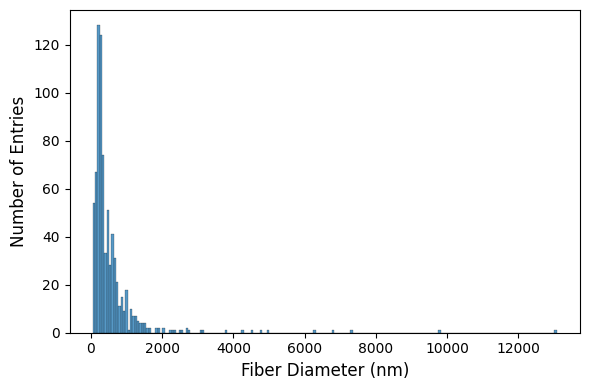

In [117]:
import seaborn as sns


plt.figure(figsize=(6, 4)) 
sns.histplot(data=df, x='fiber_diameter_nm', bins=200, kde=False)

plt.xlabel('Fiber Diameter (nm)', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
# plt.title('Fiber Diameter Distribution', fontsize=14)

plt.tight_layout()
plt.show()


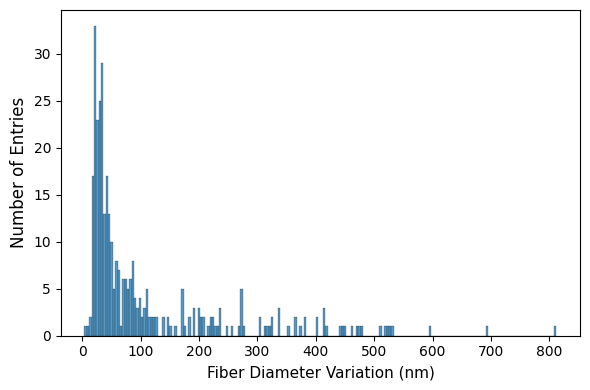

In [118]:
plt.figure(figsize=(6, 4)) 

sns.histplot(data=df, x='fiber_diameter_variation_nm', bins=200, kde=False)

plt.xlabel('Fiber Diameter Variation (nm)', fontsize=11)
plt.ylabel('Number of Entries', fontsize=12)
# plt.title('Fiber Diameter Variation Distribution', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [120]:
unique_values = df['doi'].unique()
len(unique_values)

57

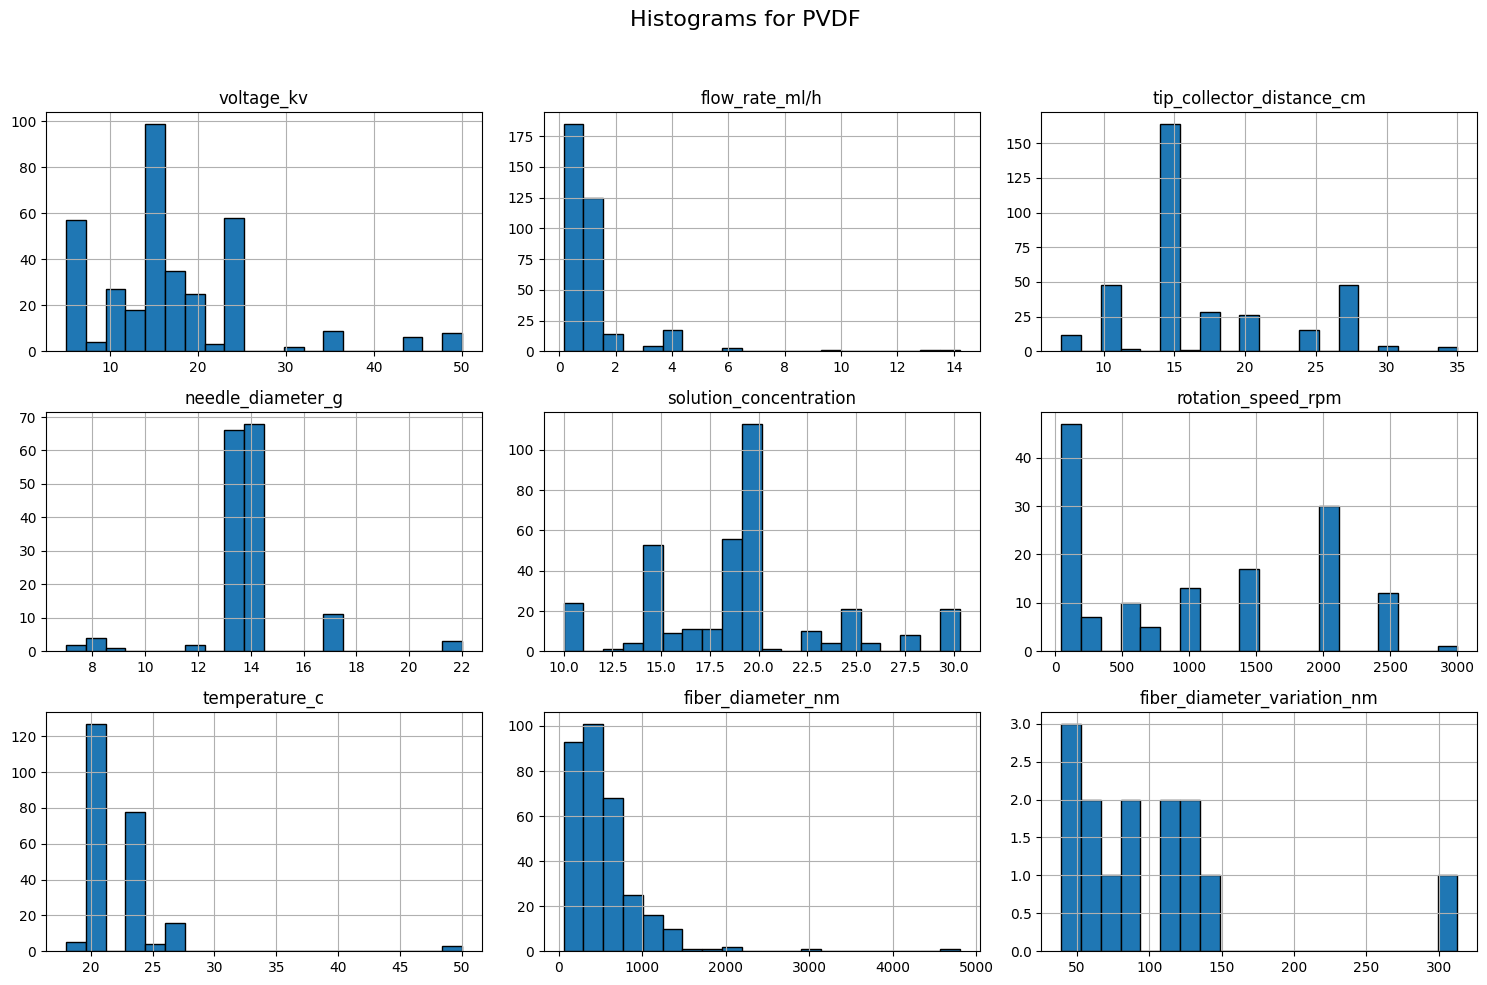

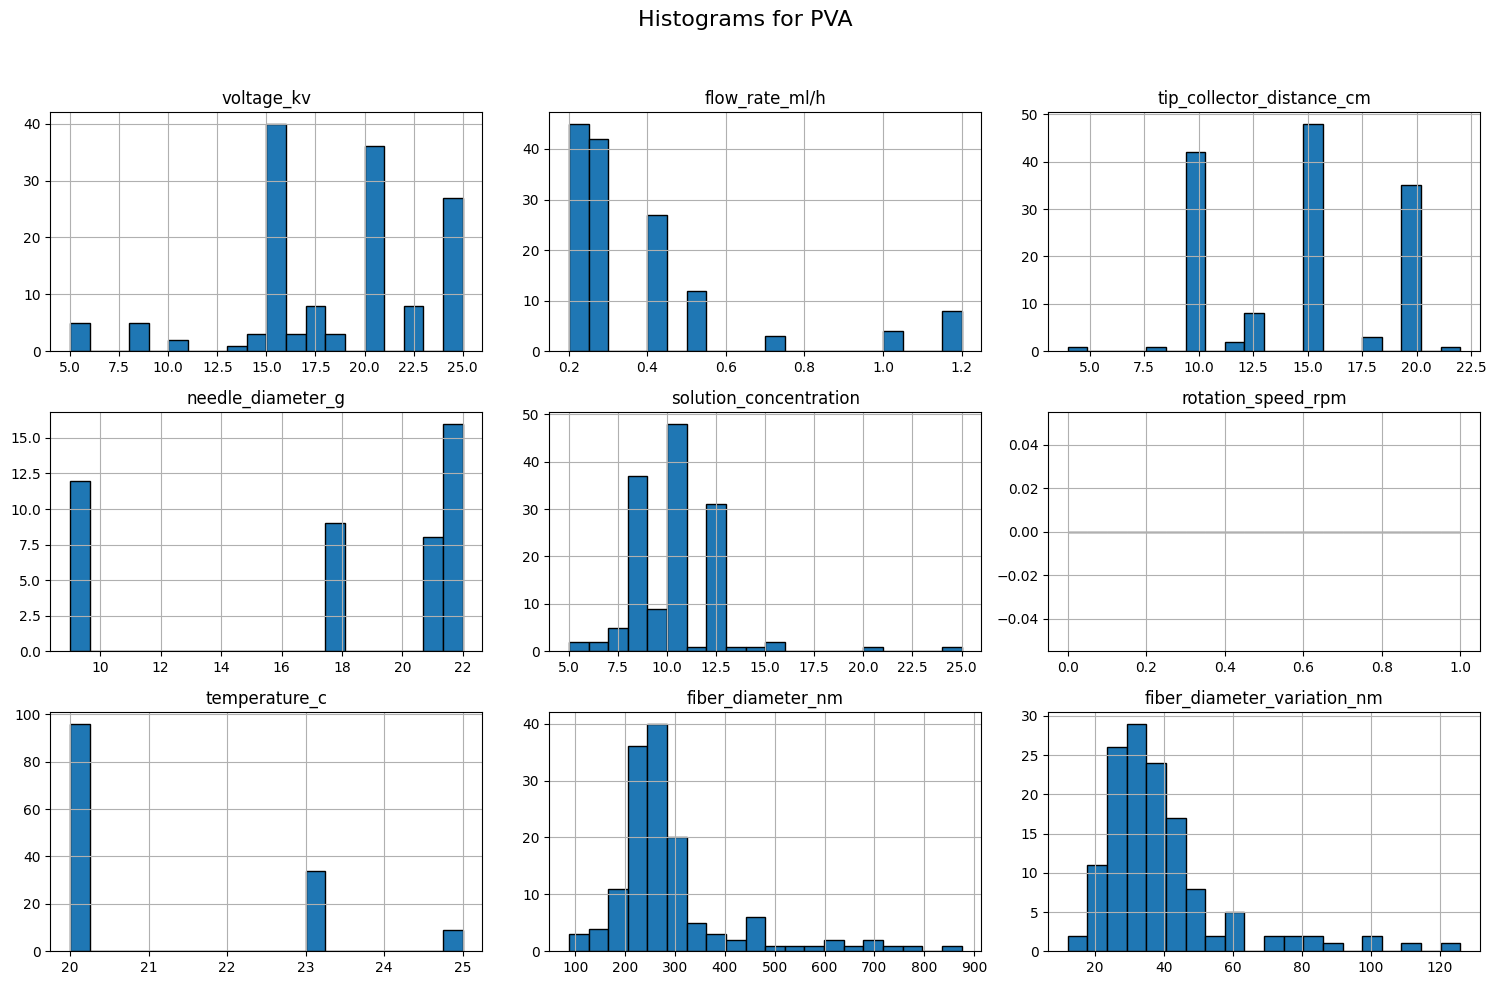

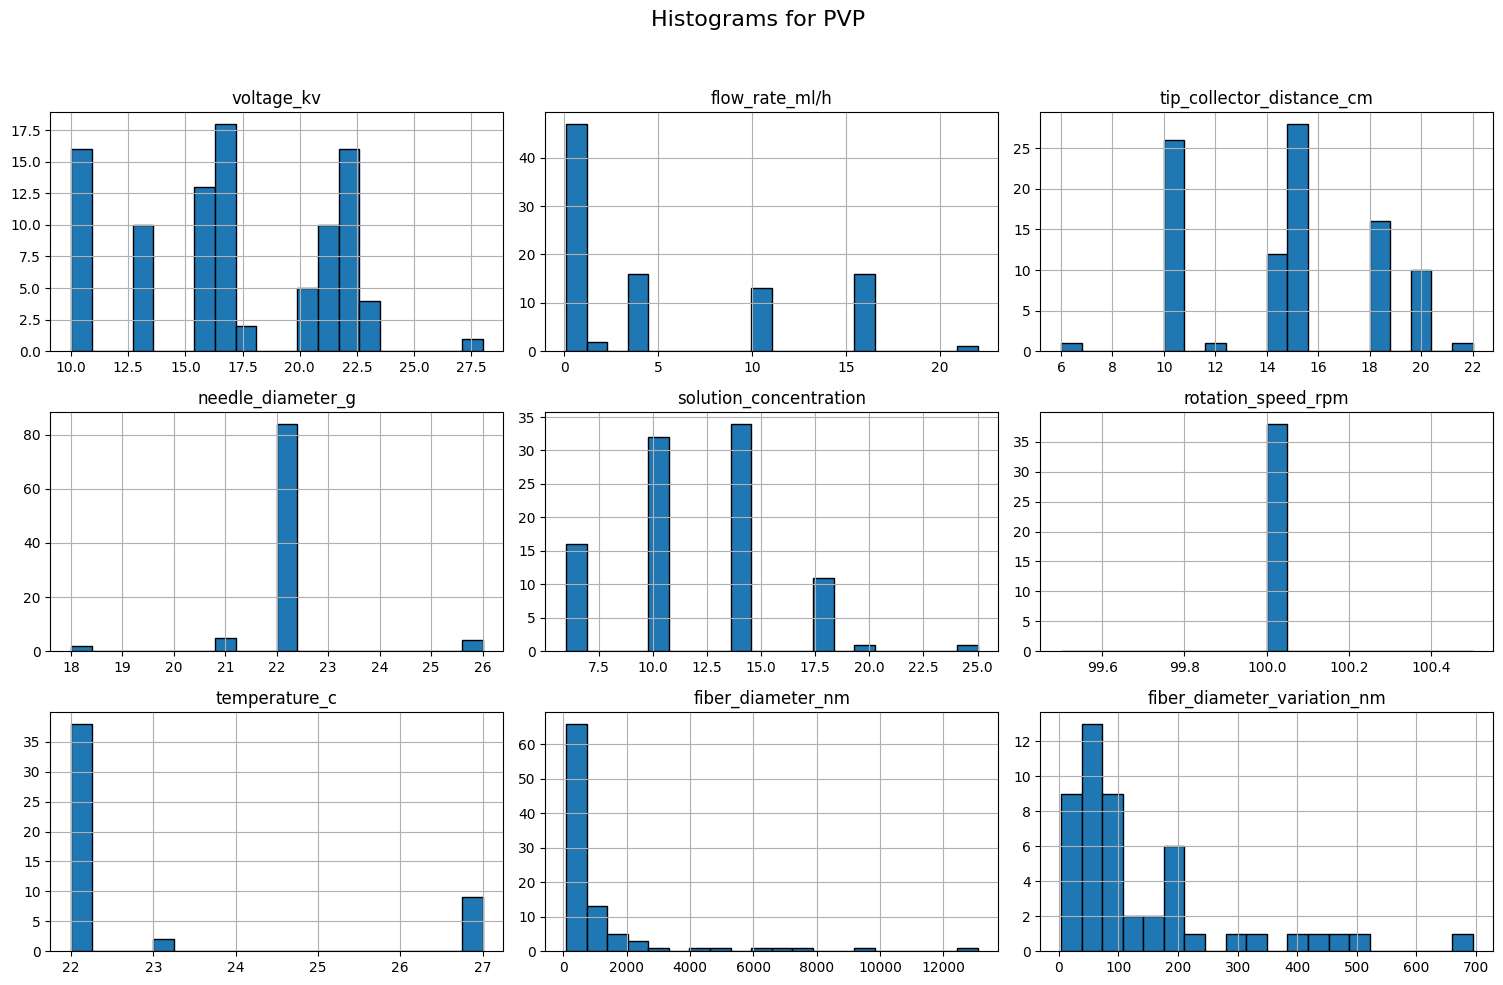

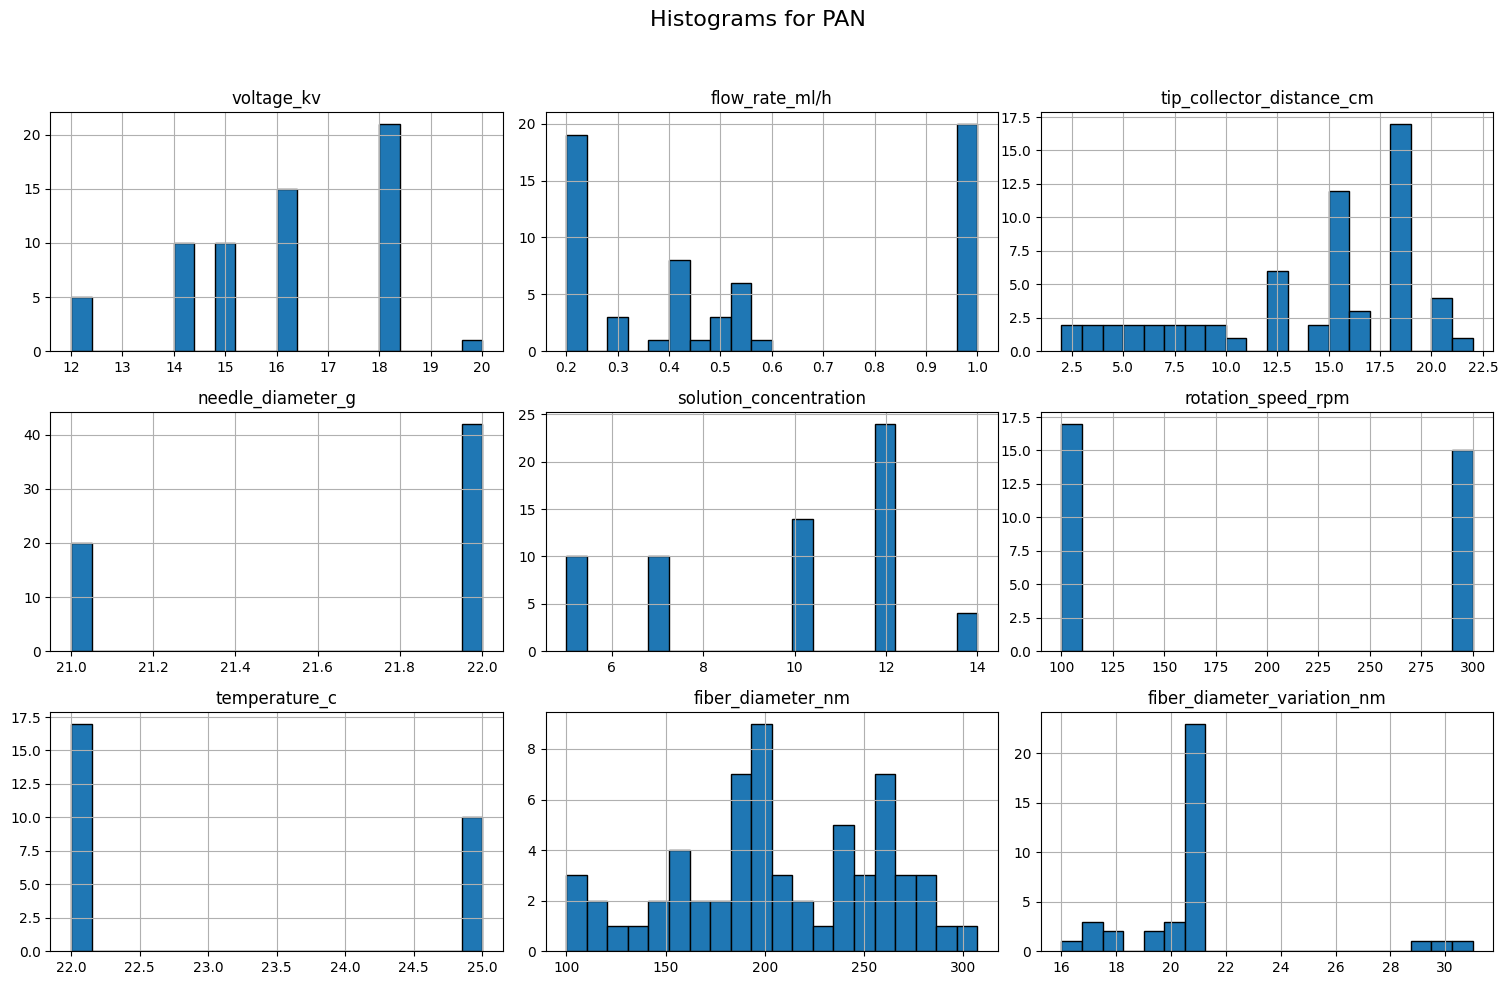

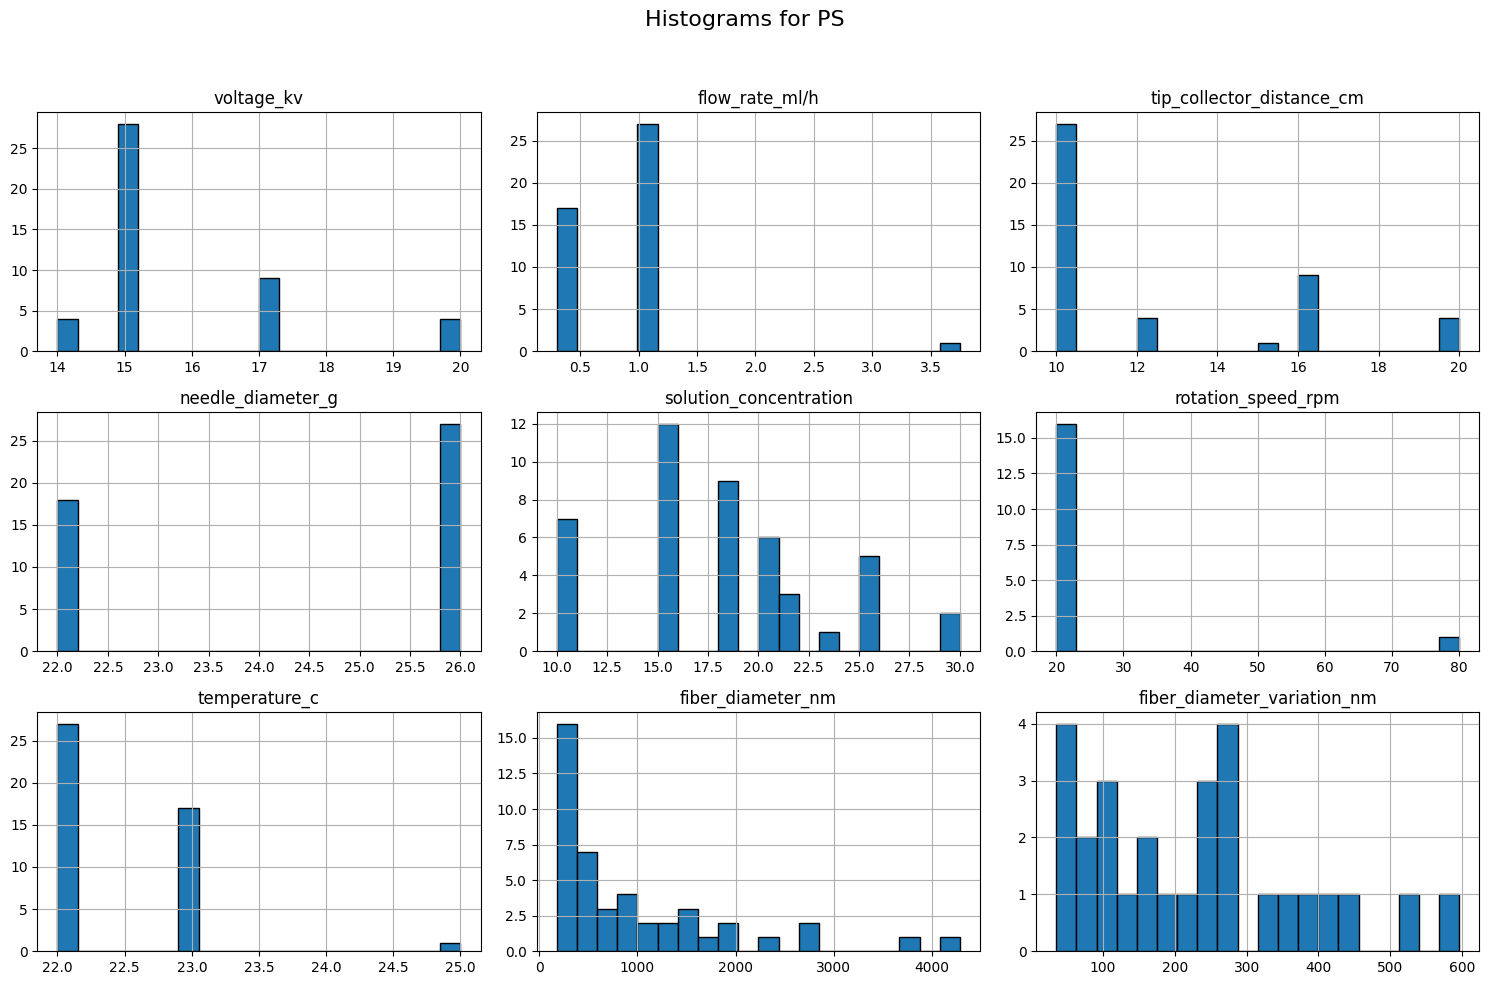

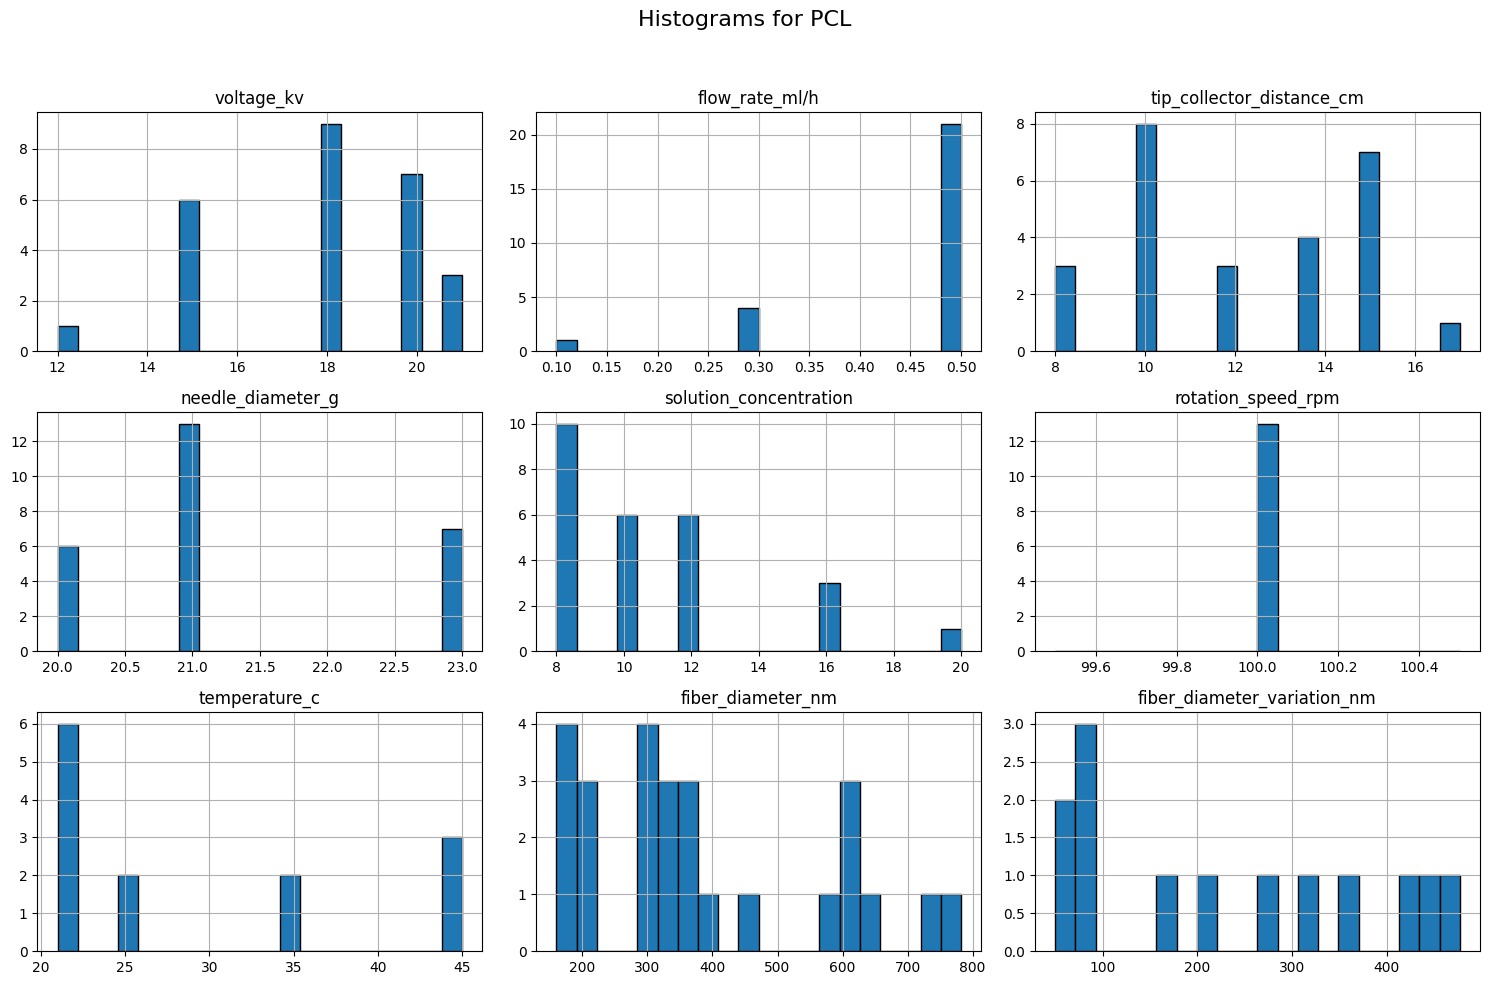

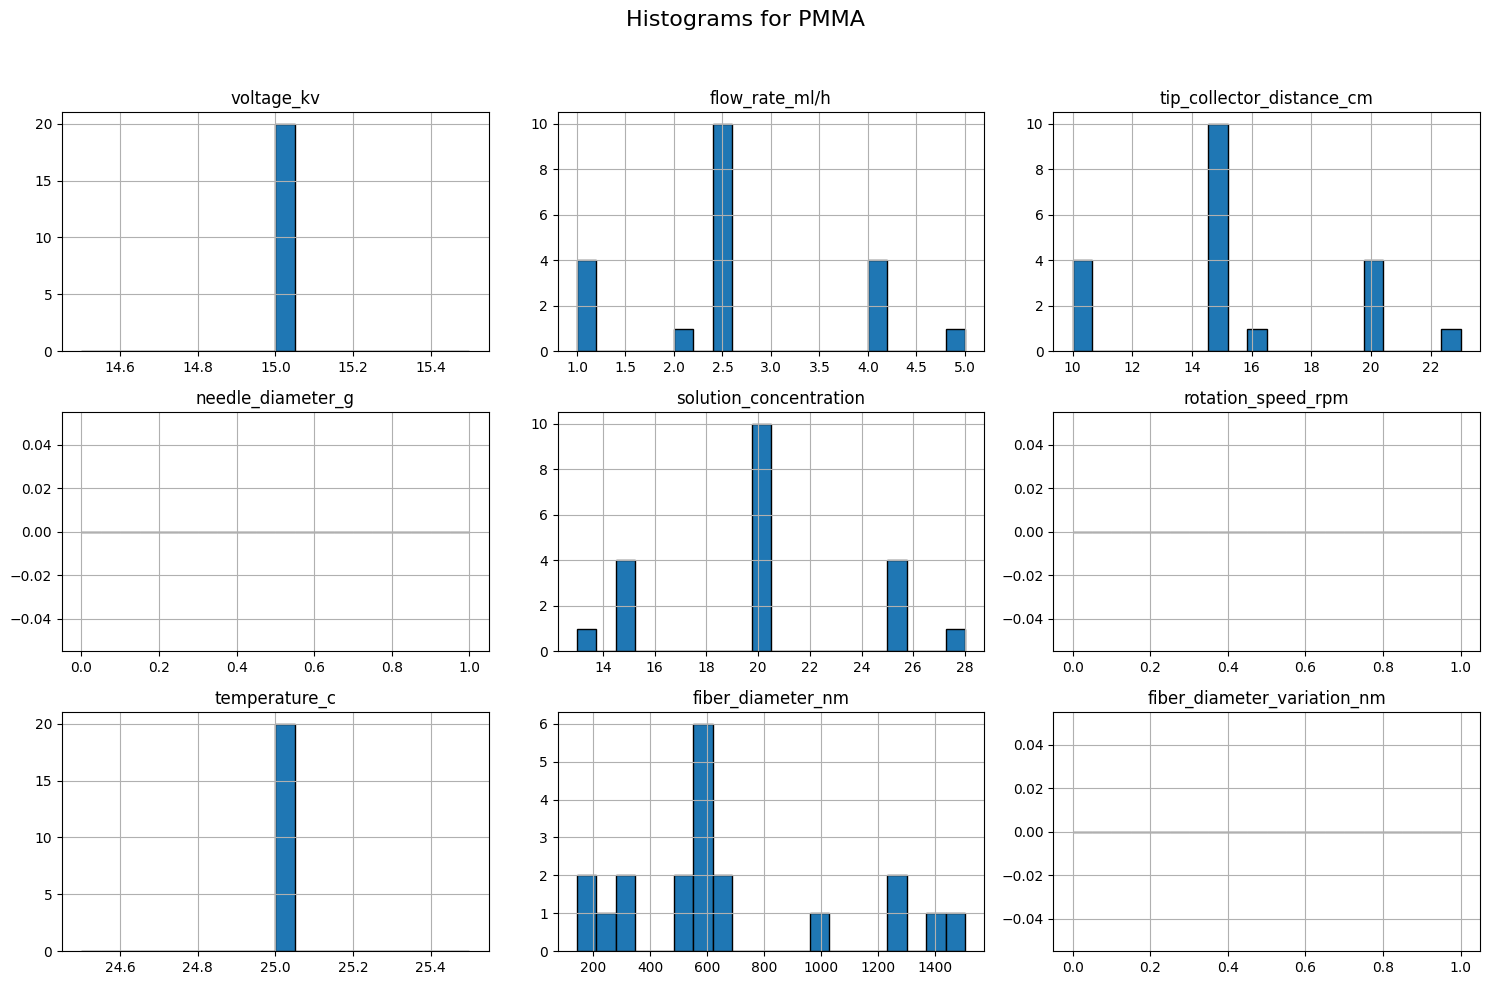

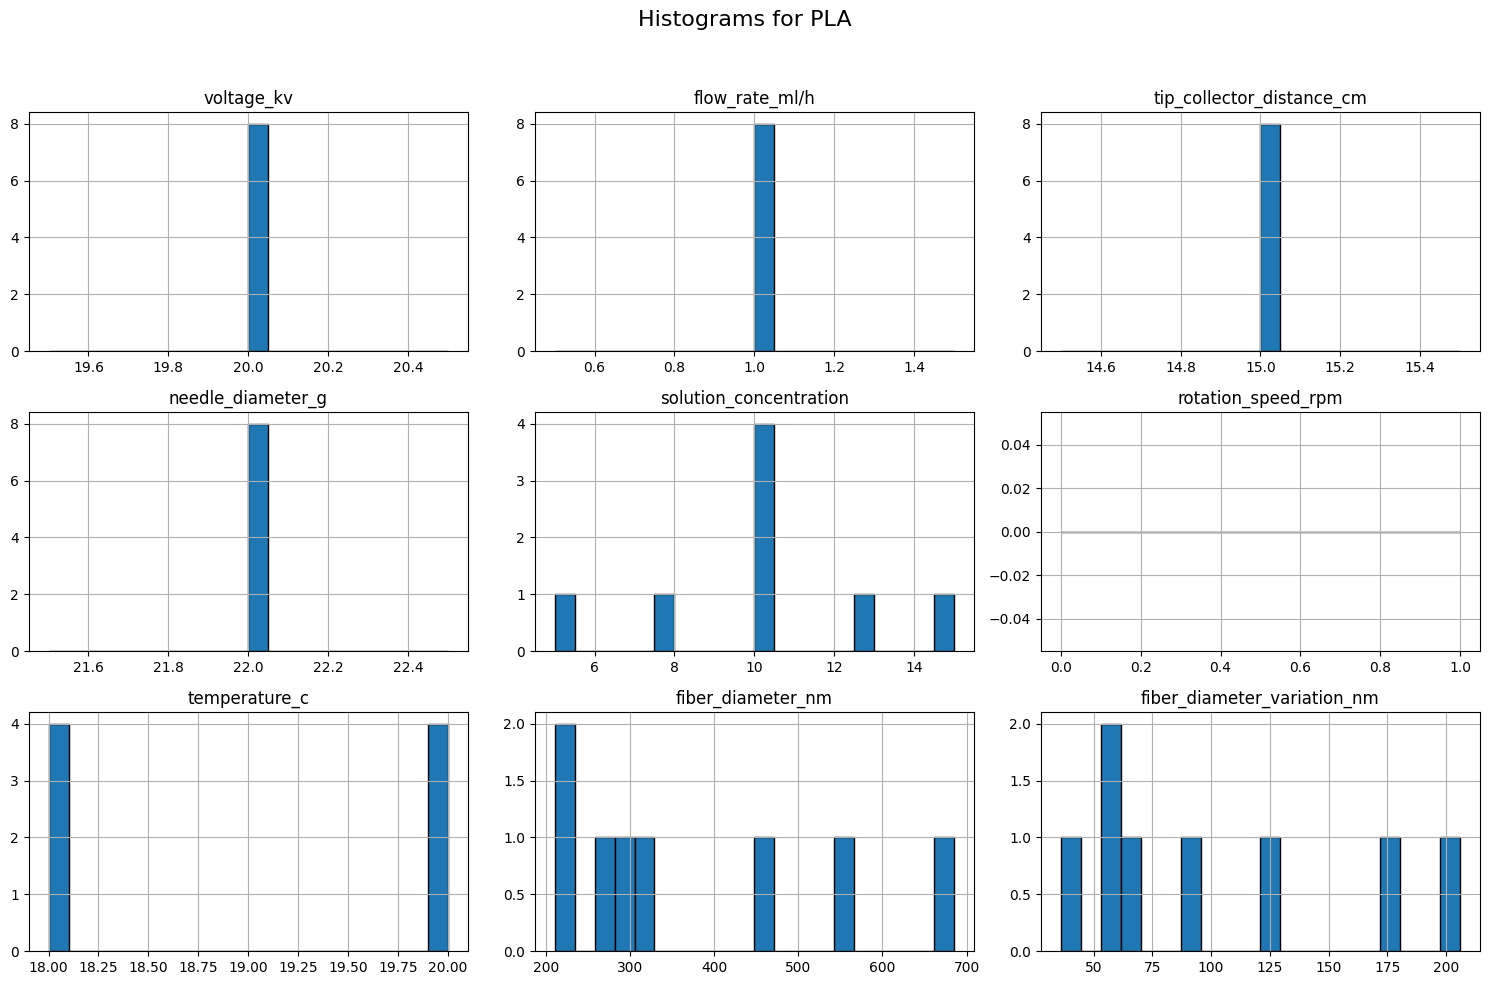

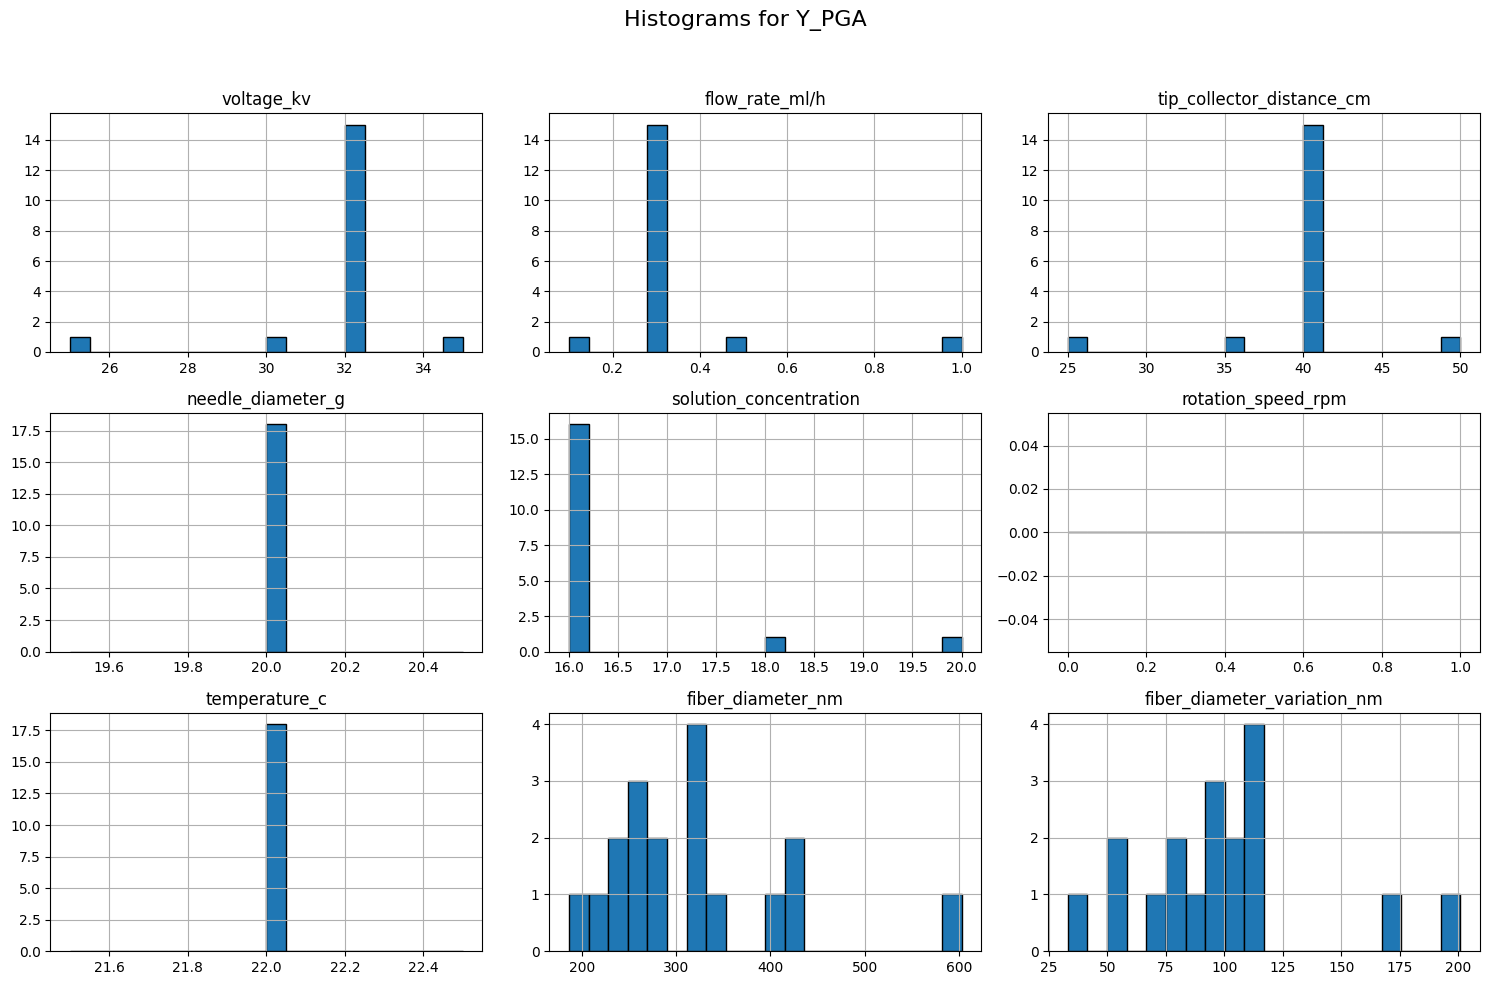

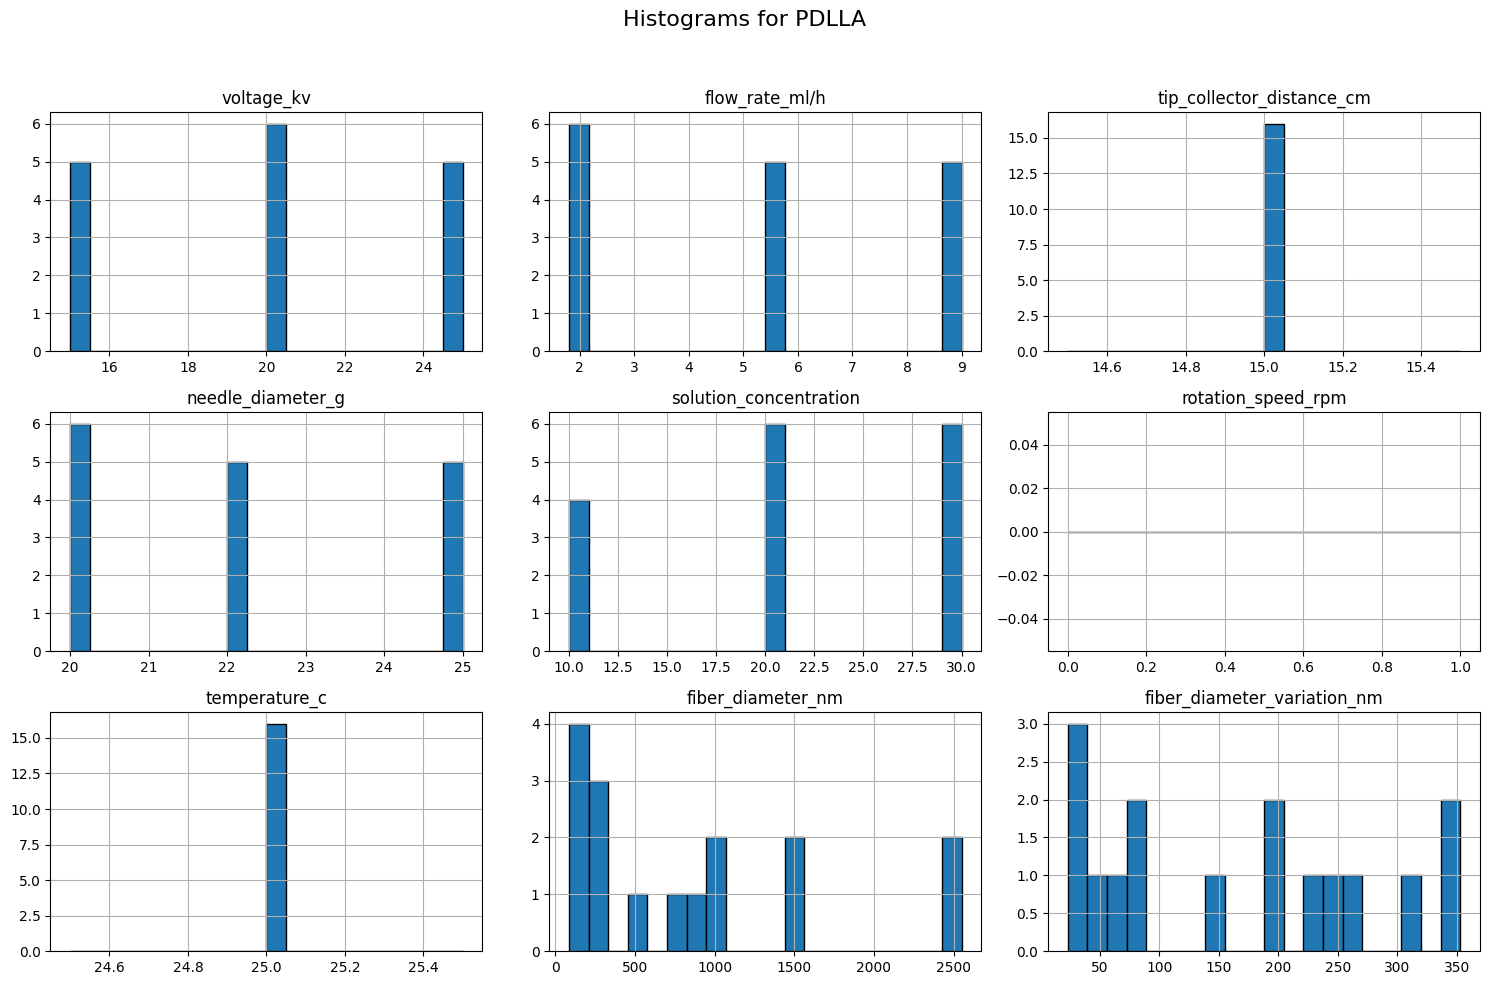

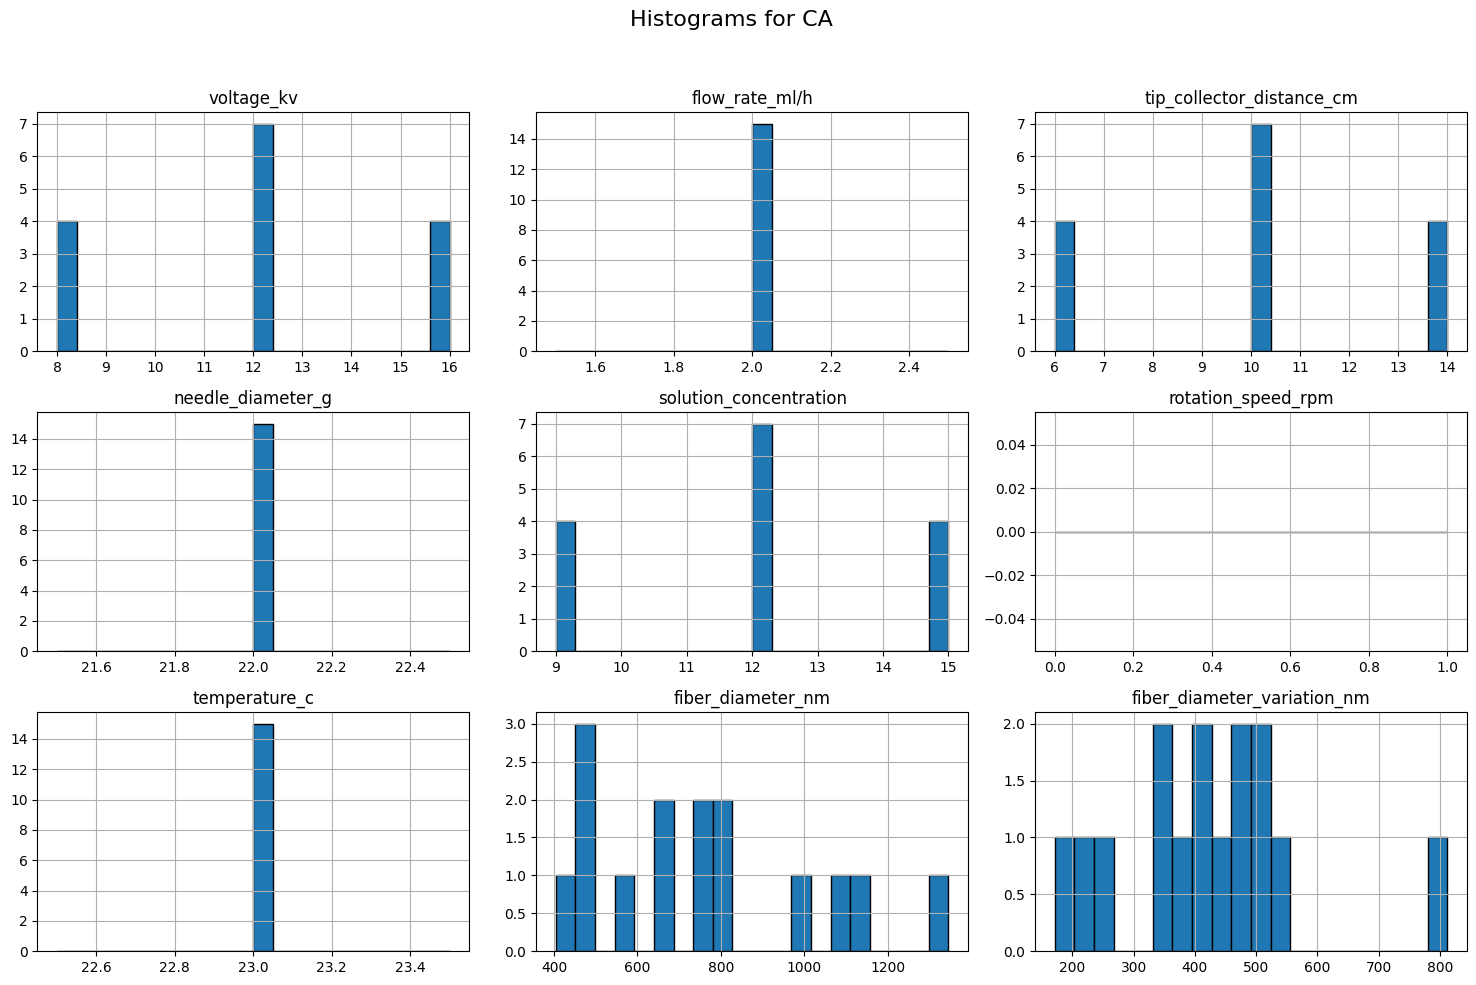

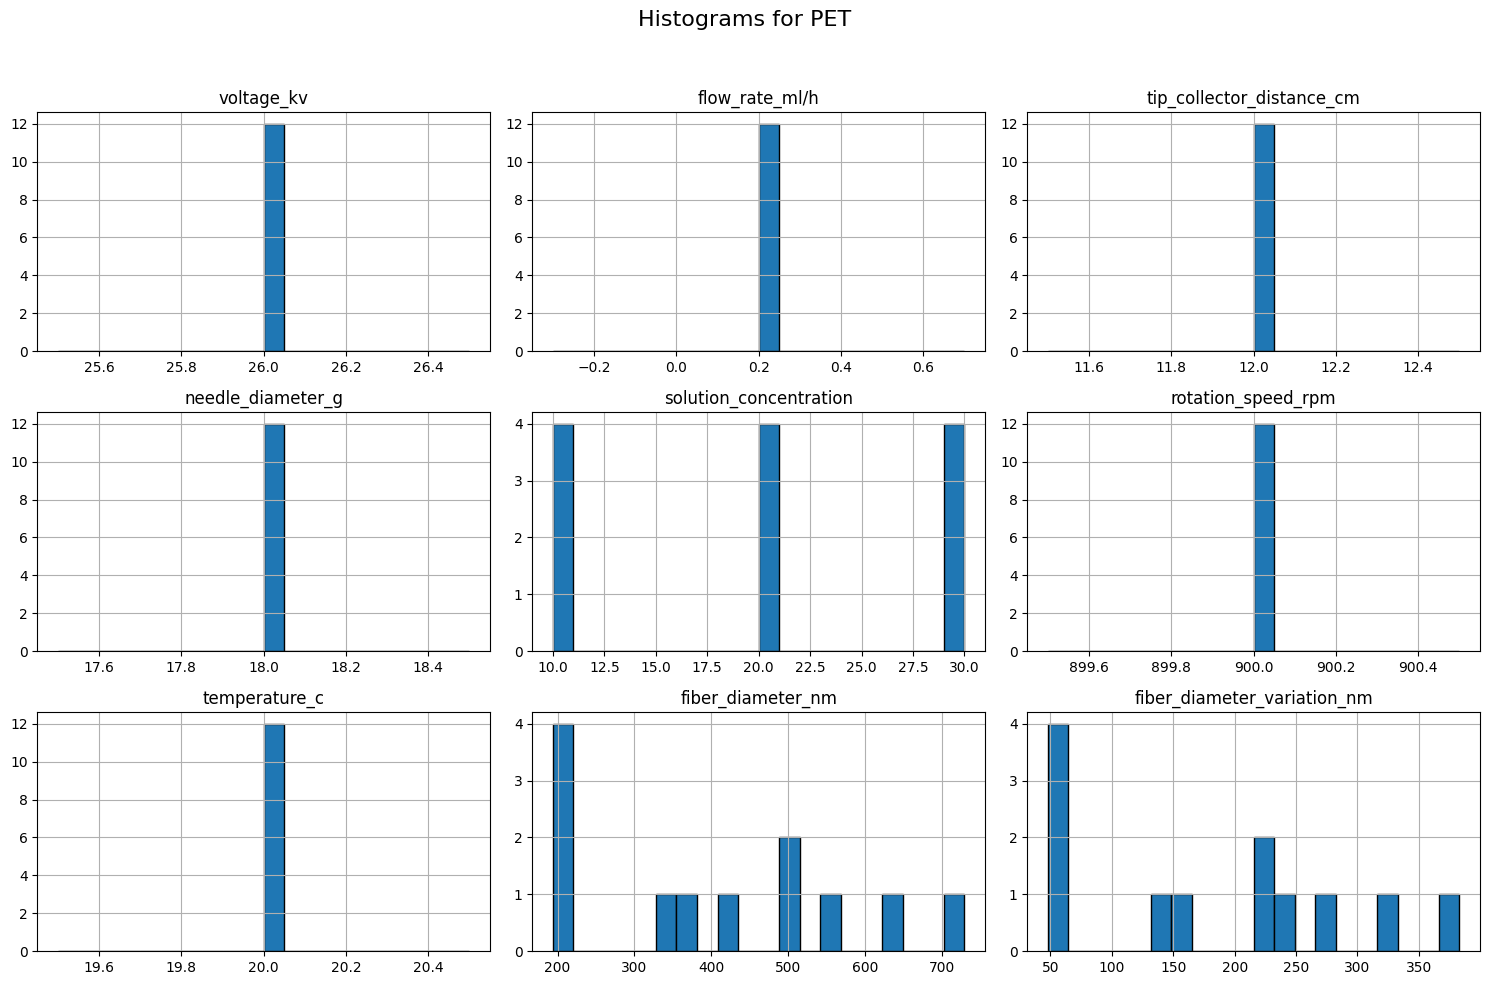

In [101]:

for polymer in polymers:
    df_poly = df[df["polymer(s)"] == polymer]
    
    if df_poly.empty:
        continue
    
    df_poly[columns_to_describe].hist(
        bins=20, figsize=(15, 10), layout=(3, 3), edgecolor='black'
    )
    plt.suptitle(f"Histograms for {polymer}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()